In [1]:
import ptc_twiss.madx_configuration as twiss_configuration
import ptc_twiss.matrix_indexes as twiss_indexes
import ptc_twiss.optics_parameters as twiss_optics_parameters
import ptc_track.madx_configuration as track_configuration
import ptc_track.matrix_indexes as track_indexes
import ptc_track.optics_parameters as track_optics_parameters
import visualization.optics_parameter_visualisation as plotter
import data.bunch_configuration as buc
import os
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.16/00


In [2]:
sns.set_style("whitegrid")

Change below path for path to unziped folder

In [3]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_matched"
script_file_name = "inputmadx_matched.madx"
xml_file_name = "configuration_reco_beam1.xml"

In [4]:
path_to_script = os.path.join(path_to_project, folder_name, script_file_name)
s = 219.55
twiss_configuration = twiss_configuration.TwissConfiguration(path_to_script, s)

In [5]:
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 2
track_configuration = track_configuration.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [10]:
x_mean = 0
sigma_x = 0
theta_x_mean = 0.000120
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.005
sigma_pt = 0.005

x_resolution = 1
theta_x_resolution = 1
y_resolution = 1
theta_y_resolution = 1
pt_resolution = 31

bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, x_resolution,
                                                       theta_x_mean, sigma_theta_x, theta_x_resolution,
                                                       y_mean, sigma_y, y_resolution,
                                                       theta_y_mean, sigma_theta_y, theta_y_resolution,
                                                        pt_mean, sigma_pt, pt_resolution)

In [11]:
title_sufix = "2017 matched"
transporter1 = "twiss; madx 5.05.02"
transporter2 = "track; madx 5.05.02"

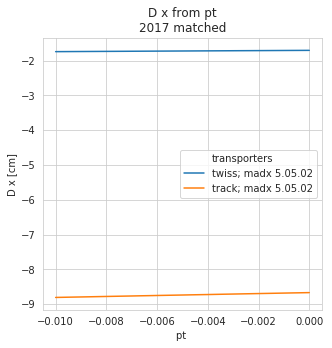

In [12]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_x, twiss_configuration),
    transporter2: (track_optics_parameters.compute_d_x, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "D x", title_sufix)

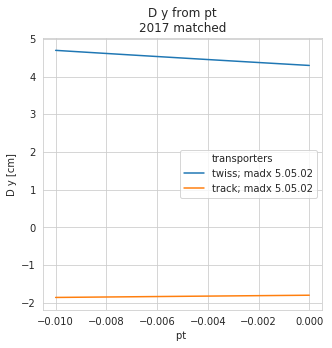

In [13]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_d_y, twiss_configuration),
    transporter2: (track_optics_parameters.compute_d_y, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "D y", title_sufix)

In [ ]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_x, twiss_configuration),
    transporter2: (track_optics_parameters.compute_l_x, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "L x", title_sufix)

In [ ]:
optical_functions = {
    transporter1: (twiss_optics_parameters.compute_l_y, twiss_configuration),
    transporter2: (track_optics_parameters.compute_l_y, track_configuration)
}

plotter.plot_optical_functions(bunch_configuration, optical_functions, "pt", "L y", title_sufix)